# Malaria detection

# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.listdir('.')

['.ipynb_checkpoints', 'data', 'logs', 'Malaria_complete.ipynb', 'models']

In [3]:
os.listdir('data/')

['test', 'train']

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data/train/'

In [7]:
image_extensions = ['jpg','jpeg','png','bmp']

In [8]:
os.listdir(os.path.join(data_dir,'Parasite'))

['C133P94ThinF_IMG_20151004_155721_cell_111.png',
 'C133P94ThinF_IMG_20151004_155721_cell_112.png',
 'C133P94ThinF_IMG_20151004_155721_cell_113.png',
 'C133P94ThinF_IMG_20151004_155721_cell_114.png',
 'C133P94ThinF_IMG_20151004_155721_cell_115.png',
 'C133P94ThinF_IMG_20151004_155721_cell_116.png',
 'C133P94ThinF_IMG_20151004_155721_cell_117.png',
 'C133P94ThinF_IMG_20151004_155721_cell_118.png',
 'C133P94ThinF_IMG_20151004_155721_cell_119.png',
 'C133P94ThinF_IMG_20151004_155721_cell_120.png',
 'C133P94ThinF_IMG_20151004_155721_cell_121.png',
 'C133P94ThinF_IMG_20151004_155721_cell_122.png',
 'C133P94ThinF_IMG_20151004_155721_cell_123.png',
 'C133P94ThinF_IMG_20151004_155721_cell_124.png',
 'C133P94ThinF_IMG_20151004_155912_cell_1.png',
 'C133P94ThinF_IMG_20151004_155912_cell_10.png',
 'C133P94ThinF_IMG_20151004_155912_cell_11.png',
 'C133P94ThinF_IMG_20151004_155912_cell_12.png',
 'C133P94ThinF_IMG_20151004_155912_cell_13.png',
 'C133P94ThinF_IMG_20151004_155912_cell_14.png',
 'C133P

In [9]:
img = cv2.imread(os.path.join(data_dir,'Parasite','C133P94ThinF_IMG_20151004_155721_cell_111.png'))
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [10]:
img.shape

(124, 121, 3)

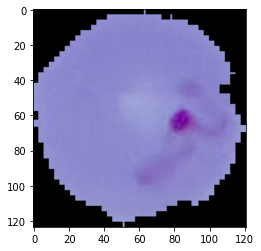

In [11]:
plt.imshow(img)
plt.show()

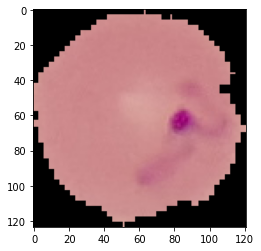

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
for image_class in os.listdir('data/train/'):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('Image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with the image {}'.format(image_path))

# 3. Load Data

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data/train/')

Found 416 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

In [17]:
batch

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [18]:
len(batch)

2

In [19]:
batch[0].shape

(32, 256, 256, 3)

In [20]:
# class 1 = Uninfected
# class 0 = Parasite

batch[1]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [21]:
data.class_names

['Parasite', 'Uninfected']

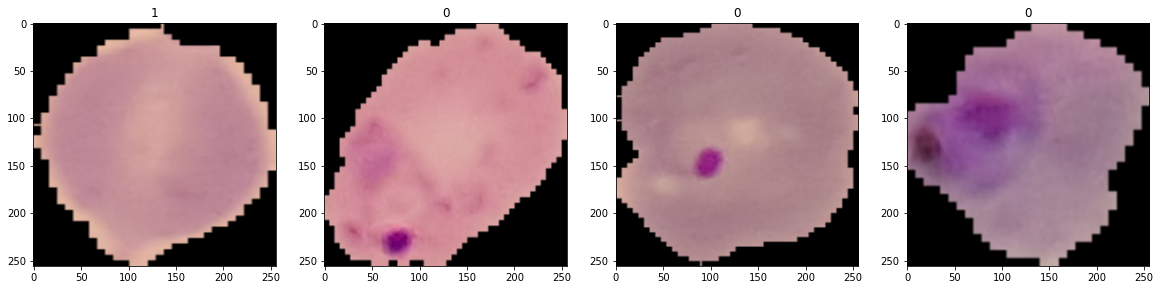

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [23]:
batch[0].min()

0.0

In [24]:
batch[0].max()

254.87343

In [25]:
scaled = batch[0]/255

In [26]:
scaled.max()

0.9995036

In [27]:
data = data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [28]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [29]:
data.as_numpy_iterator().next()[0].min()

0.0

In [30]:
data.as_numpy_iterator().next()[0].max()

1.0

# 5. Split Data

In [31]:
len(data)

13

In [32]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [33]:
train_size, val_size, test_size

(9, 2, 2)

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [40]:
logdir = 'logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 14s 1s/step - loss: 0.7583 - accuracy: 0.4757 - val_loss: 0.6936 - val_accuracy: 0.4219
Epoch 2/20
9/9 [==============================] - 11s 1s/step - loss: 0.6805 - accuracy: 0.5972 - val_loss: 0.6569 - val_accuracy: 0.5000
Epoch 3/20
9/9 [==============================] - 11s 1s/step - loss: 0.6129 - accuracy: 0.6250 - val_loss: 0.6413 - val_accuracy: 0.6094
Epoch 4/20
9/9 [==============================] - 11s 1s/step - loss: 0.6020 - accuracy: 0.6528 - val_loss: 0.5045 - val_accuracy: 0.7969
Epoch 5/20
9/9 [==============================] - 11s 1s/step - loss: 0.4583 - accuracy: 0.7951 - val_loss: 0.3417 - val_accuracy: 0.8906
Epoch 6/20
9/9 [==============================] - 10s 1s/step - loss: 0.4916 - accuracy: 0.7431 - val_loss: 0.6338 - val_accuracy: 0.6406
Epoch 7/20
9/9 [==============================] - 10s 1s/step - loss: 0.4207 - accuracy: 0.8264 - val_loss: 0.3759 - val_accuracy: 0.8906
Epoch 8/20
9/9 [==================

In [43]:
hist

In [44]:
hist.history

{'loss': [0.7582852840423584,
  0.6804774403572083,
  0.612879753112793,
  0.6019846200942993,
  0.45831239223480225,
  0.4915542006492615,
  0.4206991493701935,
  0.3570008873939514,
  0.32032835483551025,
  0.25770220160484314,
  0.21687361598014832,
  0.15389332175254822,
  0.10713618248701096,
  0.17147649824619293,
  0.18838611245155334,
  0.10335031896829605,
  0.040202368050813675,
  0.02132018841803074,
  0.007881274446845055,
  0.01196986436843872],
 'accuracy': [0.4756944477558136,
  0.5972222089767456,
  0.625,
  0.6527777910232544,
  0.7951388955116272,
  0.7430555820465088,
  0.8263888955116272,
  0.8715277910232544,
  0.8645833134651184,
  0.8993055820465088,
  0.9236111044883728,
  0.9583333134651184,
  0.9652777910232544,
  0.9305555820465088,
  0.9375,
  0.9791666865348816,
  1.0,
  0.9930555820465088,
  1.0,
  1.0],
 'val_loss': [0.6935849189758301,
  0.6569151878356934,
  0.6412782669067383,
  0.5044777393341064,
  0.341728538274765,
  0.6338363885879517,
  0.3758701

# 8. Plot Performance

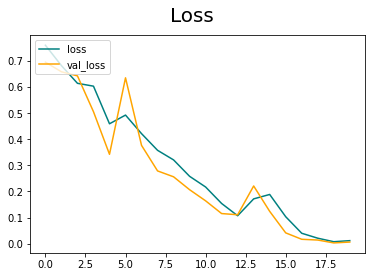

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

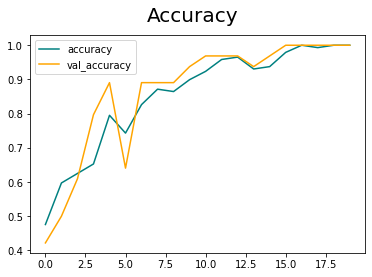

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
len(test)

2

In [50]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 329ms/step


In [51]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [52]:
yhat=[]
y_true = []

for batch in test.as_numpy_iterator():
    X, y = batch
    y_true = y_true + y.tolist()
    yhat = yhat+[1 if element>0.5 else 0 for element in model.predict(X)]

1/1 [==============================] - 0s 319ms/step


In [53]:
y_pred = np.array(yhat)
y_test = np.array(y_true)

In [54]:
y_test

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [55]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [56]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        27

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



#### See we are gettting 100% accuracy on test data that is great

# 10. Test

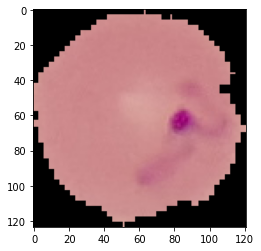

In [57]:
img = cv2.imread(os.path.join(data_dir,'Parasite','C133P94ThinF_IMG_20151004_155721_cell_111.png'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

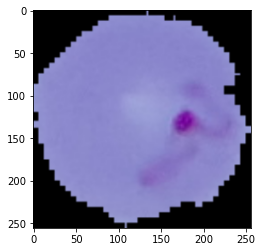

In [58]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [59]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 206ms/step


In [60]:
yhat

array([[4.861988e-07]], dtype=float32)

In [61]:
if yhat > 0.5: 
    print(f'Uninfected')
else:
    print(f'Parasite')

Parasite


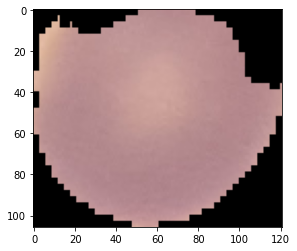

In [62]:
img = cv2.imread(os.path.join(data_dir,'Uninfected','C1_thinF_IMG_20150604_104722_cell_15.png'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

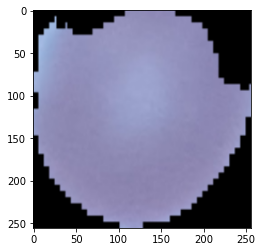

In [63]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 62ms/step


In [65]:
yhat

array([[0.99974686]], dtype=float32)

In [66]:
if yhat > 0.5: 
    print(f'Uninfected')
else:
    print(f'Parasite')

Uninfected


# 11. Save the Model

In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save(os.path.join('models','Malaria.h5'))

In [69]:
new_model = load_model(os.path.join('models','Malaria.h5'))

In [70]:
new_model

In [71]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [72]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 205ms/step


In [73]:
if yhat > 0.5: 
    print(f'Uninfected')
else:
    print(f'Parasite')

Uninfected
